## Lab Assignment: Advanced Data Visualization with Seaborn, Plotly, and MatPlotLib
Student:     **MARY-ZITTA MUABE**

### Objective: To apply knowledge of more advanced data visualizations using some of the additional standard Python libraries.
### Instructions:
In this lab assignment, you will be given the following eight problems to solve. Each problem requires you to implement a solution using one of the named visualization libraries in Python. Read the problem statement carefully and make sure you understand the requirements before starting to code.
1. Load the dataset titanic.csv using Pandas
2. Create a bar plot using Seaborn to visualize the count of passengers in each passenger class (Pclass) in the Titanic dataset. Label the x-axis, y-axis, and add a title to the plot.
3. Use Plotly to create an interactive scatter plot to visualize the relationship between the age and fare paid by passengers in the Titanic dataset. Include tooltips that display additional information about each data point when hovering over them.
4. Create a histogram using Matplotlib to visualize the distribution of passenger ages in the Titanic dataset. Customize the bin size, color, and transparency of the bars.
5. Use Seaborn to create a box plot to compare the fare distribution across different passenger classes (Pclass) in the Titanic dataset. Add labels to the x-axis and y-axis, and include a legend to indicate the passenger classes.
6. Create a line plot using Plotly to display the survival rate of passengers based on their age in the Titanic dataset. Group the data by age range and calculate the survival rate for each group. Add a title and axis labels to the plot.
7. Use Matplotlib to create a stacked bar plot to visualize the survival count of passengers in different passenger classes (Pclass) and embarkation ports (Embarked) in the Titanic dataset. Customize the colors, add a legend, and include a title for the plot.
8. Create a heat map using Seaborn to visualize the correlation matrix of numerical variables in the Titanic dataset, such as age, fare, and number of siblings/spouses aboard (SibSp). Customize the color palette and add annotations to the cells to display the correlation values.


### Deliverable:
Modify this notebook to include the python code as well as any documentation related to your submission.  Submit the notebook as your response in Blackboard.

### Grading Criteria:

Your lab assignment will be graded based on the following criteria:

- Correctness of the implementation
- Proper use of basic control structures and functions
- Code efficiency
- Clarity and readability of the code
- Compliance with the instructions and deliverables.

### Student Submission

Loading the titanic Dataset

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Load the Titanic dataset from Seaborn
titanic = sns.load_dataset('titanic')

Bar Plot of Count of Passengers in Each Class

C:\Users\Kihumba\AppData\Local\Temp\ipykernel_13672\1033881616.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




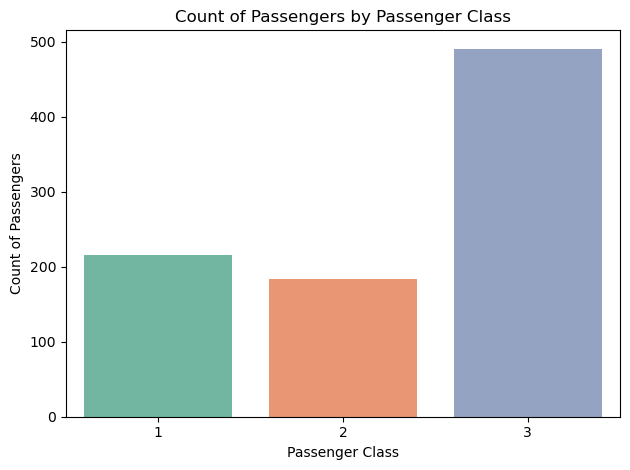

In [32]:
sns.countplot(x='pclass', data=titanic, palette='Set2')
plt.title('Count of Passengers by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count of Passengers')
plt.tight_layout()
plt.show()


Interactive scatter plot to visualize the relationship between the age and fare 

In [22]:
import plotly.express as px

fig = px.scatter(
    titanic,
    x="age",
    y="fare",
    color="sex",
    hover_data=["pclass", "survived", "embarked"]
)

# hover tooltips
fig.update_traces(
    hovertemplate=(
        "Age: %{x}<br>"
        "Fare: %{y}<br>"
        "Sex: %{customdata[0]}<br>"
        "Survived: %{customdata[1]}<br>"
        "Embarked: %{customdata[2]}"
    )
)

# labels and title
fig.update_layout(
    xaxis_title="Age",
    yaxis_title="Fare",
    title="Relationship between Age and Fare"
)

fig.show()


Histogram to visualize the distribution of passenger ages 

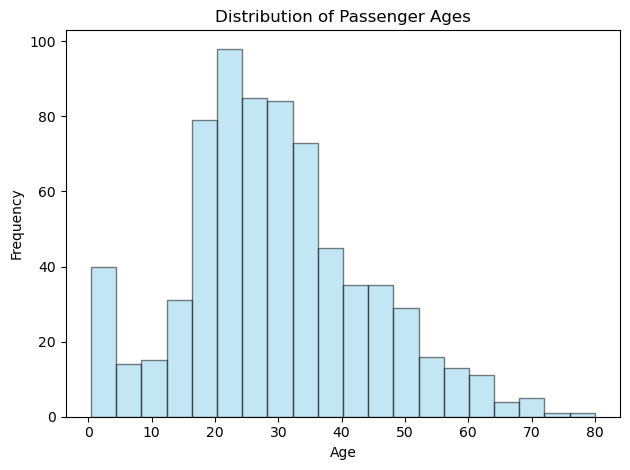

In [25]:
plt.hist(
    titanic['age'].dropna(),
    bins=20,
    color='skyblue',
    alpha=0.5,
    edgecolor='black'
)
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Box plot to compare the fare distribution across different passenger classes

C:\Users\Kihumba\AppData\Local\Temp\ipykernel_13672\1396867479.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




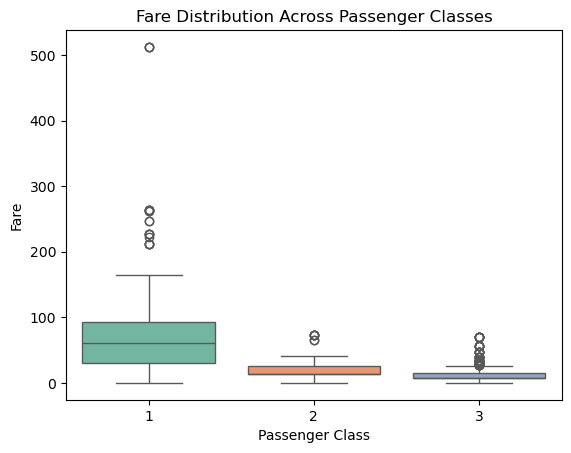

In [33]:
sns.boxplot(x='pclass', y='fare', data=titanic, palette='Set2')
plt.title('Fare Distribution Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


Line plot to display the survival rate of passengers based on their age 

In [44]:
# Calculating survival rate
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=np.arange(0, 90, 10))
survival_rate = titanic.groupby('AgeGroup', observed=True)['survived'].mean().reset_index()
survival_rate['AgeGroup'] = survival_rate['AgeGroup'].astype(str)

# Line Plot
fig = px.line(
    survival_rate,
    x='AgeGroup',
    y='survived',
    title='Survival Rate by Age Group',
    markers=True
)

fig.update_layout(
    xaxis_title='Age Group',
    yaxis_title='Survival Rate'
)

fig.show()



Stacked bar plot to visualize the survival count of passengers in different passenger classes

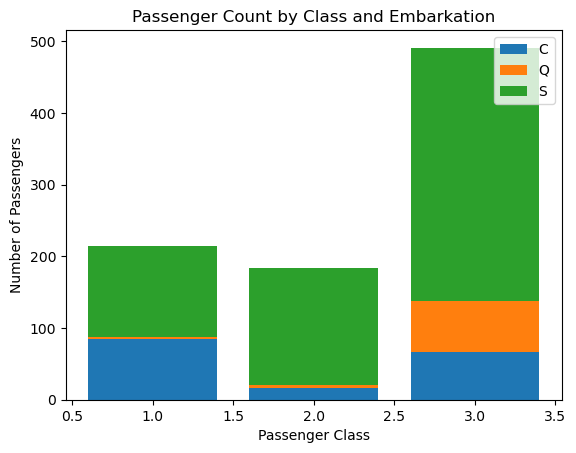

In [49]:
# Grouping by passenger class and embarkation port to get survival counts
survival_counts = titanic.groupby(['pclass', 'embarked'], observed=True)['survived'].count().unstack(fill_value=0)
pclass = survival_counts.index

# stacked bar plot
plt.bar(pclass, survival_counts['C'], label='C')
plt.bar(pclass, survival_counts['Q'], bottom=survival_counts['C'], label='Q')
plt.bar(pclass, survival_counts['S'], bottom=survival_counts['C'] + survival_counts['Q'], label='S')
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Passenger Count by Class and Embarkation")
plt.legend(loc="upper right")

plt.show()



Heat map to visualize the correlation matrix of numerical variables 

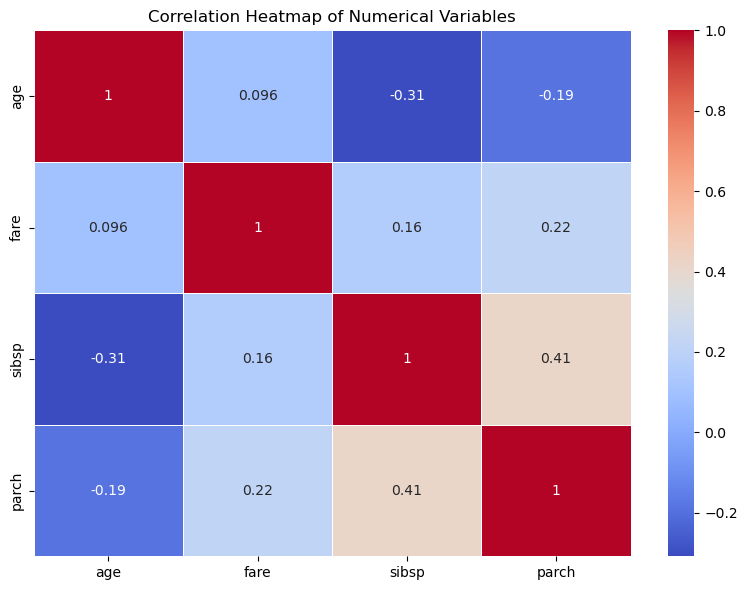

In [57]:
plt.figure(figsize=(8, 6))
numerical_cols = ['age', 'fare', 'sibsp', 'parch']
titanic_numerical = titanic[numerical_cols]
corr_matrix = titanic_numerical.corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Correlation Heatmap of Numerical Variables')
plt.tight_layout()
plt.show()

In [54]:
numeric_cols = titanic.select_dtypes(include=['number']).columns
print(numeric_cols)


Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object')
